# Exploratory Data Analysis for Diabetes Dataset and Classification Prediction

Diabetes is a major public health concern in the United States, affecting millions of individuals and placing a heavy burden on the healthcare system. According to the Centers for Disease Control and Prevention (CDC), over 37 million Americans—about 1 in 10 people—have diabetes, and approximately 1 in 5 of them don't even know they have it. Additionally, over 96 million adults are estimated to have prediabetes, a condition that often leads to type 2 diabetes if not addressed.

Diabetes is not just a condition of high blood sugar; it significantly increases the risk of heart disease, kidney failure, nerve damage, hypertension, and even vision loss. It disproportionately affects certain demographic groups based on age, race, gender, and socioeconomic status. Lifestyle factors such as smoking history, obesity (BMI), and hypertension are also closely linked to its onset and progression.

In this notebook, we explore a dataset containing various features related to individuals across the USA to better understand the patterns, correlations, and risk factors that may contribute to a diabetes diagnosis. The dataset includes demographic details like gender, age, race, and location, as well as medical factors such as blood_glucose_level, hbA1c_level, bmi, heart_disease, and more.

Our goal is to analyze these features and develop a classification model that can help predict whether an individual is diabetic, providing insights that could assist in early detection and preventive healthcare strategies.

## 1. Importing Libraries and reading data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Read the dataset into a data frame
df = pd.read_csv("/kaggle/input/diabetes-clinical-dataset100k-rows/diabetes_dataset_with_notes.csv")

In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [5]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## 2. Exploratory Data Analysis

### Year

In [6]:
# Exploring the year column
year = df['year'].value_counts().reset_index().rename(columns={'count':'number_of_entires'})

In [7]:
year

,year,number_of_entires
0,2019,79745
1,2015,8760
2,2016,8760
3,2018,2678
4,2020,42
5,2022,8
6,2021,7


We can observe that the data frequency for 2015, 2016, 2019 are way better than data frequency for 2020, 2021, 2022.

 ### Gender 

In [8]:
gender = df['gender'].value_counts().reset_index().rename(columns={0:'No of entries'})
gender

,gender,count
0,Female,58552
1,Male,41430
2,Other,18


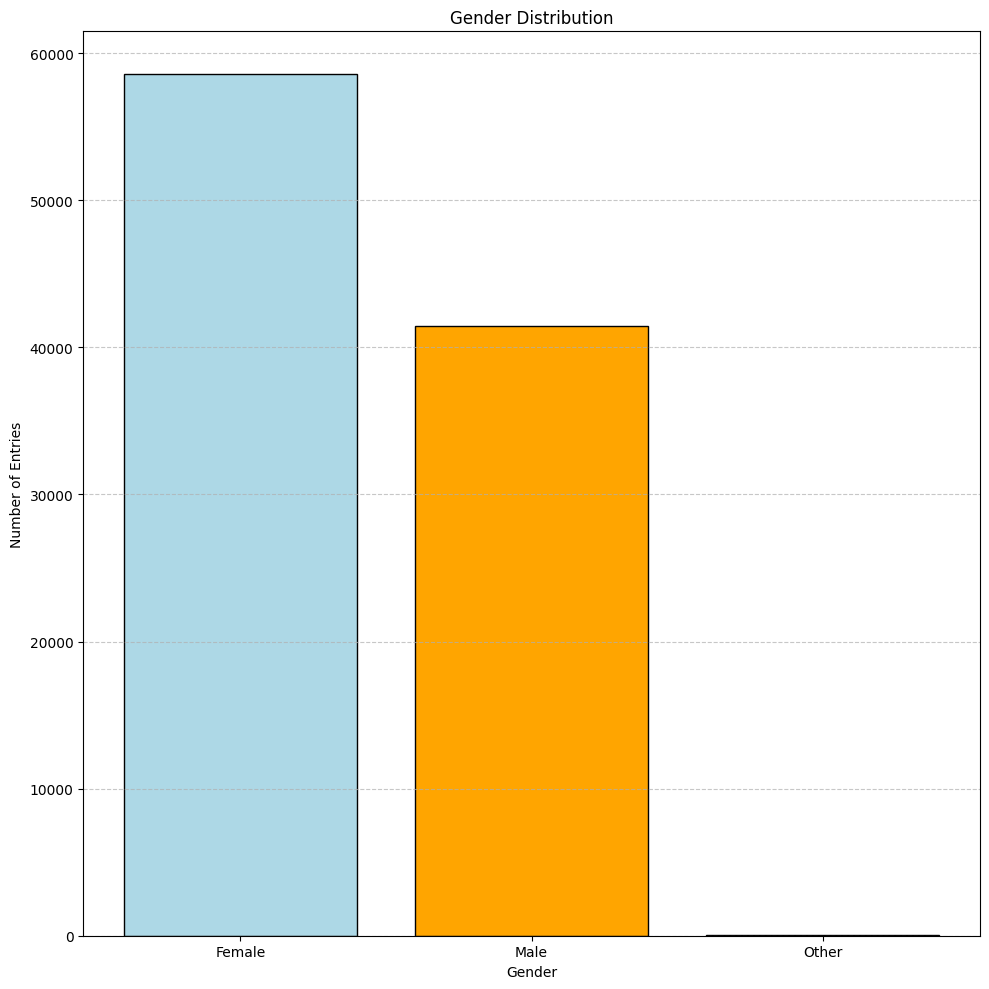

In [9]:
plt.figure(figsize=(10,10))
plt.bar(gender['gender'], gender['count'],color=['lightblue', 'orange', 'purple'], edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Age

In [10]:
# Exploring the age column
age = df['age'].value_counts().reset_index().rename(columns={'count':'No_of_entires'})

In [11]:
age

,age,No_of_entires
0,80.00,5621
1,51.00,1619
2,47.00,1574
3,48.00,1568
4,53.00,1542
...,...,...
97,0.48,83
98,1.00,83
99,0.40,66
100,0.16,59


The Range of age is from 0.08 to 80. 

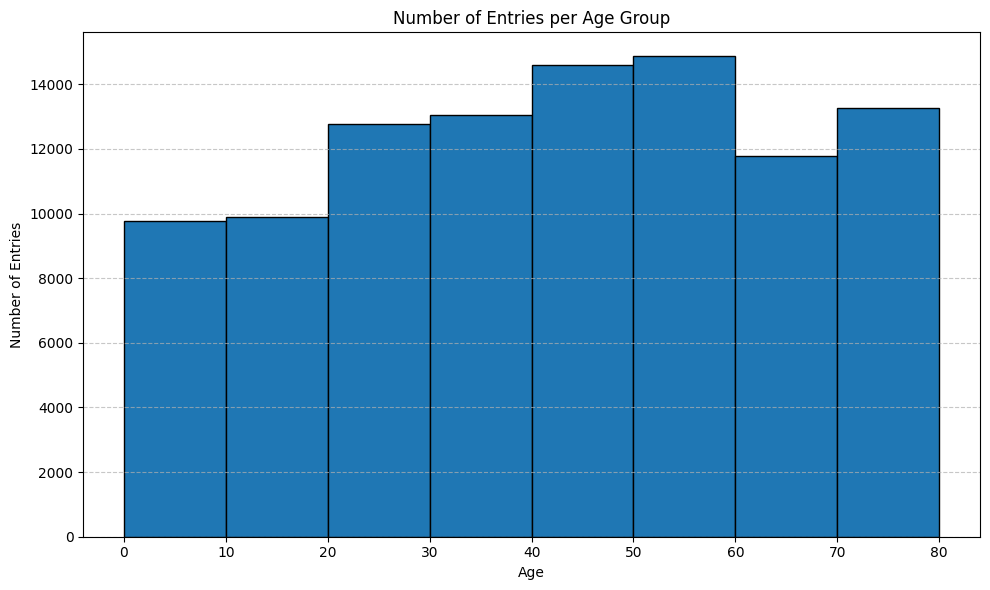

In [12]:

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=[0,10,20,30,40,50,60,70,80], edgecolor='black')
plt.title('Number of Entries per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Entries')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


All the age groups are represented fairly in the dataset 

### Race

In [13]:
#Exploring the races 
race = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other']]

In [14]:
zeros = (race==0).sum()
ones = (race==1).sum()
race_counts = pd.DataFrame({'zero':zeros,'one':ones})
race_counts


,zero,one
race:AfricanAmerican,79777,20223
race:Asian,79985,20015
race:Caucasian,80124,19876
race:Hispanic,80112,19888
race:Other,80002,19998


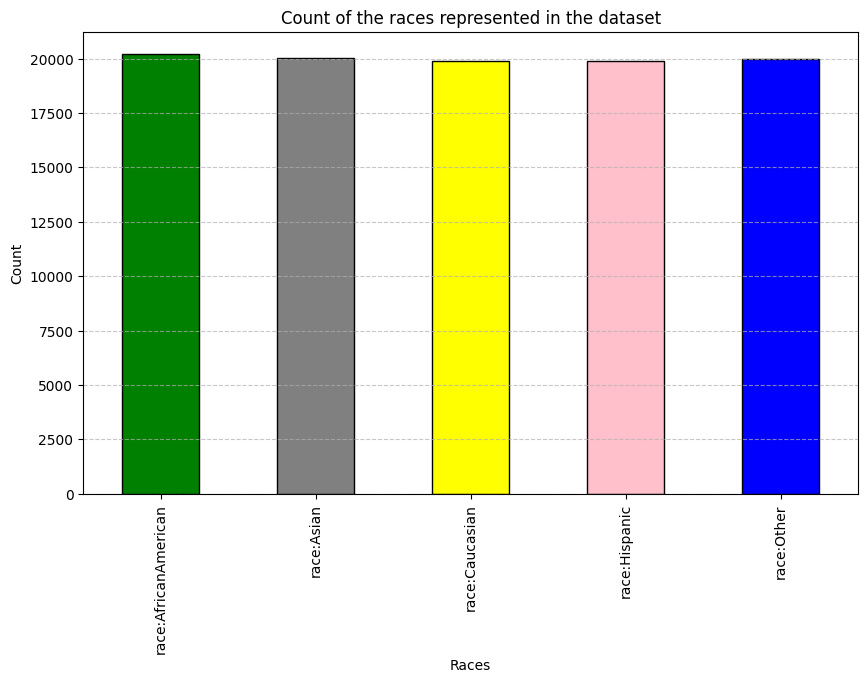

In [15]:
plt.figure(figsize=(10,6))
race_counts['one'].plot(kind='bar', edgecolor='black',color=['green','grey','yellow','pink','blue'])
plt.title('Count of the races represented in the dataset')
plt.xlabel('Races')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)


All the races are fairly represented in the dataset 

### Location


In [16]:
#Exploring locations
df['location'].nunique()

55

In [17]:
df['location'].value_counts()

location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho

Wisconsin and Wyoming have lesser entires as compared to other locations.                 

### Hypertension 

In [18]:
BP = df['hypertension'].value_counts()

In [19]:
BP.index=['No Hypertension','Have Hypertension']
BP

No Hypertension      92515
Have Hypertension     7485
Name: count, dtype: int64

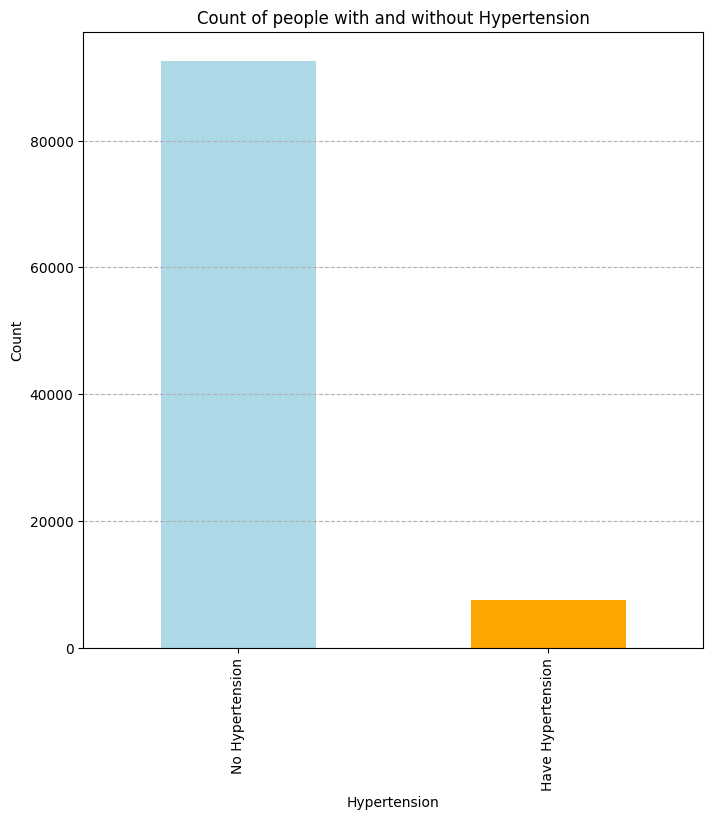

In [20]:
plt.figure(figsize=(8,8))
BP.plot(kind='bar', color=['lightblue','orange'], xlabel='Hypertension', ylabel='Count', title='Count of people with and without Hypertension')
plt.grid(axis='y', linestyle='--')
plt.show()

Most of the people do not have hypertension 

### Heart Disease 

In [21]:
heart_disease = df['heart_disease'].value_counts()

In [22]:
heart_disease.index=['No Heart Disease', 'Have Heart Disease']
heart_disease

No Heart Disease      96058
Have Heart Disease     3942
Name: count, dtype: int64

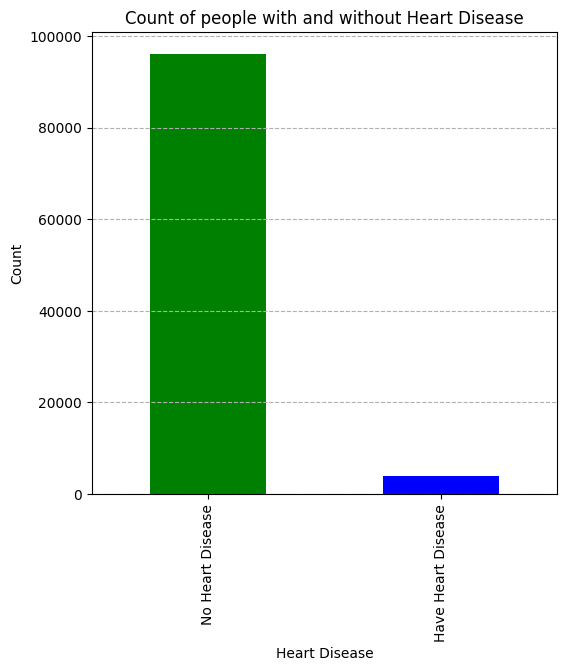

In [23]:
plt.figure(figsize=(6,6))
heart_disease.plot(kind='bar', color=['green','blue'], xlabel='Heart Disease', ylabel='Count', title='Count of people with and without Heart Disease')
plt.grid(axis='y', linestyle='--')
plt.show()

The amount of people with a heart disease is around 4000. 

### Smoking

In [24]:
smoke = df['smoking_history'].value_counts()

In [25]:
smoke

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

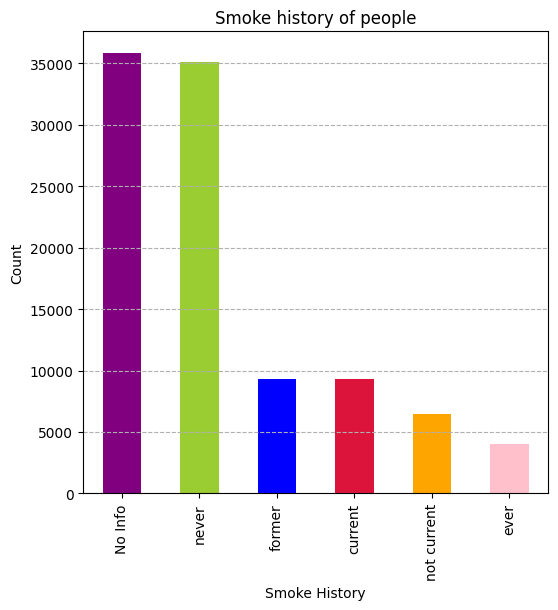

In [26]:
plt.figure(figsize=(6,6))
smoke.plot(kind='bar', color=['purple','yellowgreen','blue','crimson','orange','pink'], xlabel='Smoke History', ylabel='Count', title='Smoke history of people')
plt.grid(axis='y', linestyle='--')
plt.show()

We can observe that we do not have the information of smoking history of a lot of people in this dataset. 35095 people have never smoked and 29089 people have some history of smoking 

### BMI 

In [27]:
adults = df[df['age'] >= 20] 
children = df[df['age'] < 20]

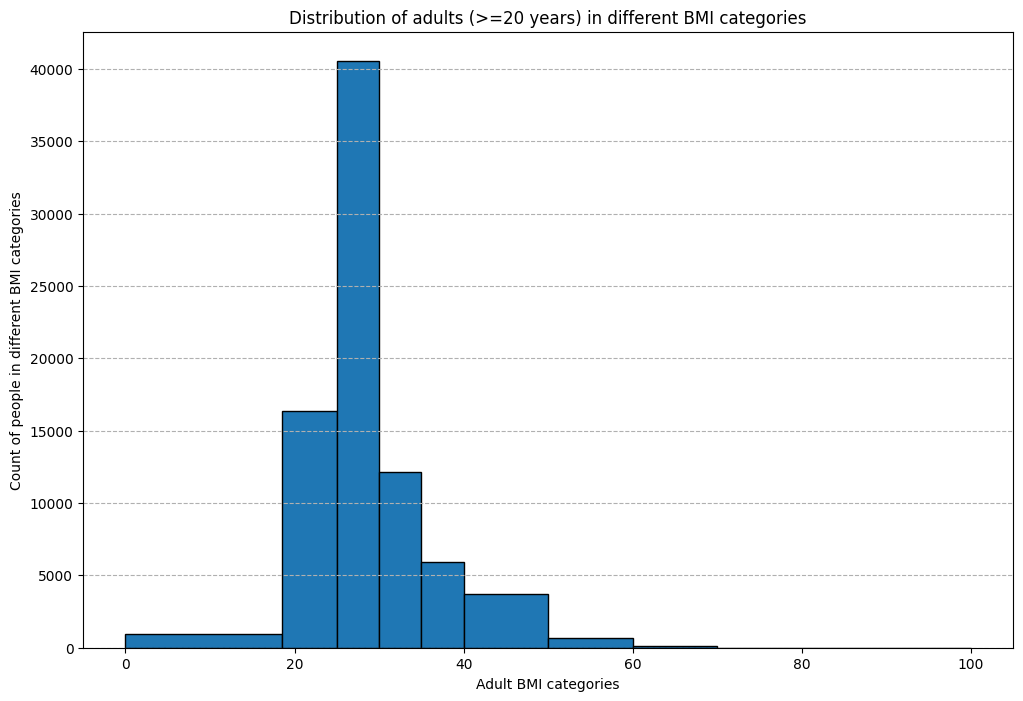

In [28]:
plt.figure(figsize=(12,8))
plt.grid(axis='y',linestyle='--')
plt.hist(adults['bmi'],bins=[0,18.5, 25, 30, 35, 40,50,60, 70, 80, 90, 100], edgecolor='black')
plt.xlabel("Adult BMI categories")
plt.ylabel("Count of people in different BMI categories")
plt.title("Distribution of adults (>=20 years) in different BMI categories")
plt.show()

BMI categories for adults 20 and older:
Underweight: Less than 18.5, 
Healthy Weight: 18.5 to less than 25, 
Overweight: 25 to less than 30, 
Obesity: 30 or greater, 
There are 3 categories in Obesity as well:
Class 1 Obesity: 30 to less than 35, 
Class 2 Obesity: 35 to less than 40, 
Class 3 Obesity: (Severe Obesity) 40 or greater.


In [29]:
print("Underweight: ",adults[adults['bmi'] < 18.5].bmi.count())

Underweight:  931


In [30]:
print("Healthyweight: ",adults[(adults['bmi'] >= 18.5) & (adults['bmi'] < 25)].bmi.count())

Healthyweight:  16351


In [31]:
print("Overweight: ",adults[(adults['bmi'] >= 25) & (adults['bmi'] < 30)].bmi.count())

Overweight:  40536


In [32]:
print("Obese: ",adults[adults['bmi'] >=30].bmi.count())

Obese:  22514


40536 adults lie in the range of 25-30 bmi which is the overweight category. 22514 adults in the Obesity category. 

In [33]:
class1_Obese = adults[(adults['bmi'] >= 30) & (adults['bmi'] < 35)].bmi.count()
class2_Obese = adults[(adults['bmi'] >= 35) & (adults['bmi'] < 40)].bmi.count()
class3_Obese = adults[adults['bmi'] >= 40].bmi.count()
print('Class1 Obese count: ',class1_Obese)
print('Class2 Obese count: ',class2_Obese)
print('Class3 Obese count: ',class3_Obese)


Class1 Obese count:  12134
Class2 Obese count:  5909
Class3 Obese count:  4471


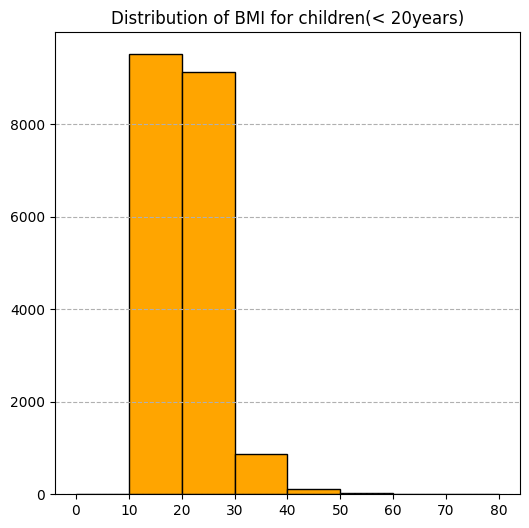

In [34]:
plt.figure(figsize=(6,6))
plt.title("Distribution of BMI for children(< 20years)")
plt.grid(axis='y',linestyle='--')
plt.hist(children['bmi'],color='orange',bins=[0,10,20,30,40,50,60,70,80],edgecolor='black')
plt.show()

For children the BMI is calculated differently. It is based on percentiles and age/sex. We can only see the distribution of bmi here. 

### HbA1C

An A1C test measures the percentage of your red blood cells that have glucose-coated hemoglobin. High A1C levels are a sign of high blood glucose from diabetes. Diabetes can cause serious health problems, including heart disease, kidney disease, and nerve damage.
![](https://b2848764.smushcdn.com/2848764/wp-content/uploads/2024/01/HbA1c-Chart.webp?lossy=1&strip=1&webp=1)

In [35]:
normal = df[df['hbA1c_level'] < 5.7].hbA1c_level.count()
prediabetes = df[(df['hbA1c_level']>=5.7) & (df['hbA1c_level'] <=6.4)].hbA1c_level.count()
diabetic = df[df['hbA1c_level'] >= 6.5].hbA1c_level.count()
print("normal : ",normal)
print("prediabetes : ",prediabetes)
print("diabetic : ",diabetic)

normal :  37857
prediabetes :  41346
diabetic :  20797


In [36]:
HbA1c = pd.Series([normal, prediabetes, diabetic], index=["Normal","Prediabetes", "Diabetes" ])
HbA1c

Normal         37857
Prediabetes    41346
Diabetes       20797
dtype: int64

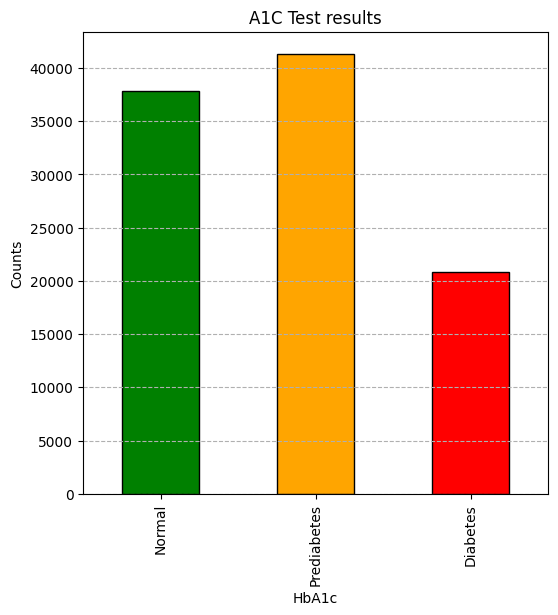

In [37]:
plt.figure(figsize=(6, 6))
HbA1c.plot(kind='bar', edgecolor='Black', legend=False, color=['Green', 'Orange', 'Red'])
plt.xlabel("HbA1c")
plt.ylabel("Counts")
plt.title("A1C Test results")
plt.grid(axis='y', linestyle='--')
plt.show()

If we consider the definition of A1C test and above preprocessing of data, we find that most people are prediabetic. But we will be diving deep and try to find the relation between HbA1c test and if or not people with HbA1c greater than 6.4 are actually classified as diabetic. 

### Blood glucose level and Diabetes 

In [38]:
df['blood_glucose_level'].value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

There is no information regarding the fact that if this blood_glucose_level is actually fasting blood glucose or not. If we consider it to be the fasting blood glucose level then the normal category lies between 80-100 mg/dL, prediabetic is considered to be between 100-125 mg/dL and diabetic is considered as above 125 mg/dL. 

If we categories these as the above mentioned classification we could see that:

In [39]:
normal = df[df['blood_glucose_level']<100].blood_glucose_level.count()
prediabetic = df[(df['blood_glucose_level'] >= 100 ) & (df['blood_glucose_level'] < 125)].blood_glucose_level.count()
diabetic = df[df['blood_glucose_level'] >= 125].blood_glucose_level.count()
print("Normal: ", normal)
print("Prediabetic: ", prediabetic)
print("Diabetic : ", diabetic)

Normal:  21119
Prediabetic:  7025
Diabetic :  71856


In [40]:
Blood_Glucose = pd.Series([normal,prediabetic,diabetic], index=["Normal", "Prediabetic", "Diabetic"])
Blood_Glucose

Normal         21119
Prediabetic     7025
Diabetic       71856
dtype: int64

<BarContainer object of 3 artists>

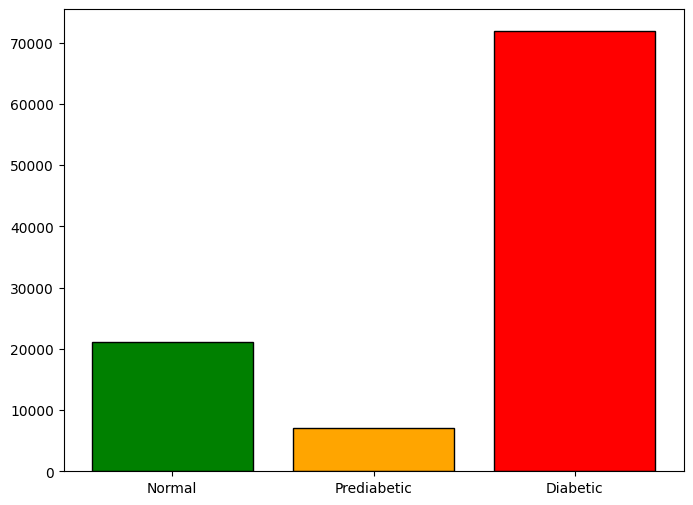

In [41]:
plt.figure(figsize=(8,6))
plt.bar(Blood_Glucose.index, Blood_Glucose.values, edgecolor='Black', color=['Green', 'Orange', 'Red'])

In [42]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

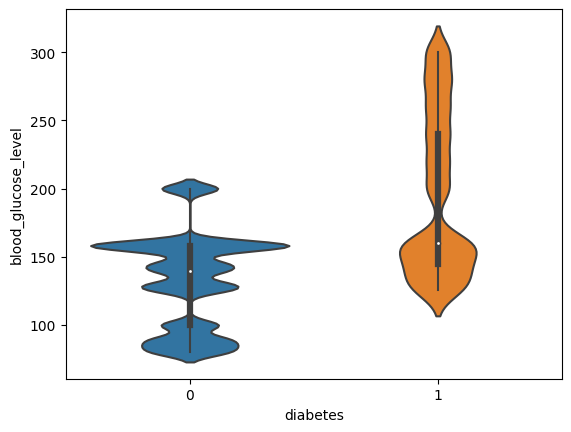

In [43]:
sns.violinplot(y='blood_glucose_level',x = 'diabetes',data=df)
plt.show()

We can observe that according to the blood_glucose_level we had 71856 categorized as diabetic but in the actual diabetes classification we are getting 8500 as diabetics which is a lot less. As we can see through the Violin plot that even when the blood glucose levels are above 125 people are categorized as Non-Diabetics. Therefore we need to examine the relations between the various features to create a model that could accurately classify the people with diabetes. The dataset is imbalanced as can be seen that most people are non-diabetic. 


## 3. Preprocessing Data

In [44]:
# We will be dropping the clinical notes and since most people's smoking history is not known we will drop that too
df = df.drop(['clinical_notes','smoking_history'], axis=1)

In [45]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [46]:
# Dealing with categorical variables 
df = pd.get_dummies(df,columns=['gender'])  # Encoding the gender column 

#For location we will do frequency encoding
location_freq = df['location'].value_counts(normalize=True)
df['loc_freq'] = df['location'].map(location_freq)
df.drop(['location'],axis=1, inplace=True)

In [47]:
df.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,loc_freq
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,True,False,False,0.02036
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,True,False,False,0.02036
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,False,True,False,0.02036
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,False,True,False,0.02036
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,True,False,False,0.02036


In [48]:
df.columns

Index(['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Female',
       'gender_Male', 'gender_Other', 'loc_freq'],
      dtype='object')

In [49]:
# Dealing with numerical columns 
scaler = StandardScaler()
num_col = ['year', 'age','bmi','hbA1c_level','blood_glucose_level']
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,loc_freq
0,1.218511,-0.439045,0,0,0,0,1,0,0,-0.000116,-0.492690,-0.934905,0,True,False,False,0.02036
1,-2.498320,-0.572279,0,1,0,0,0,0,0,-1.110599,-0.492690,-1.180558,0,True,False,False,0.02036
2,-2.498320,-1.060805,0,0,0,0,1,0,0,-0.536523,-0.679490,0.539009,0,False,True,False,0.02036
3,-2.498320,-0.039342,0,0,1,0,0,0,0,-0.000116,-1.426688,0.514444,0,False,True,False,0.02036
4,-1.754954,0.449184,1,0,0,0,0,0,0,-0.538029,0.908306,-1.180558,0,True,False,False,0.02036


## 4. Feature Engineering 

We will here create another dataset and do some feature engineering to see if adding certain features contributes towards a better prediction 

In [50]:
#1. Age BMI interaction 
df['age_bmi'] = df['age'] * df['bmi']
df['comorbidity_count'] = df['hypertension'] + df['heart_disease']

## 5. Using different ML Algorithms

In [51]:
# Splitting the data 
y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Dealing with the imbalanced dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [52]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 73206, 1: 6794})
After SMOTE: Counter({0: 73206, 1: 73206})



LogisticRegression:

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18294
           1       0.43      0.87      0.58      1706

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.76     20000
weighted avg       0.94      0.89      0.91     20000

AUC: 0.961188035180498


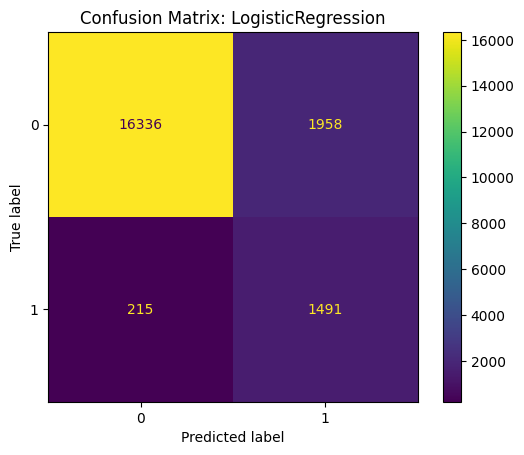


Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18294
           1       0.81      0.74      0.77      1706

    accuracy                           0.96     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.96      0.96      0.96     20000

AUC: 0.9694610600776096


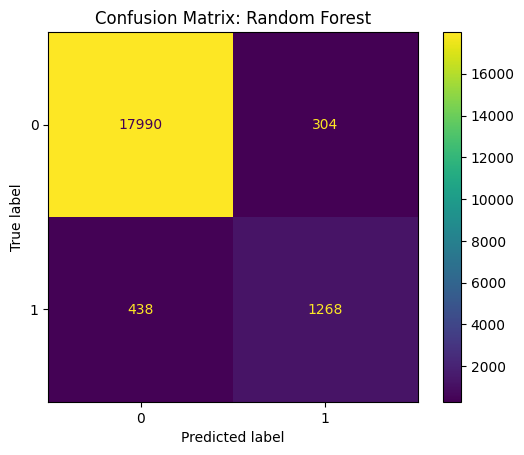


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18294
           1       0.77      0.77      0.77      1706

    accuracy                           0.96     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.96      0.96      0.96     20000

AUC: 0.976086705344554


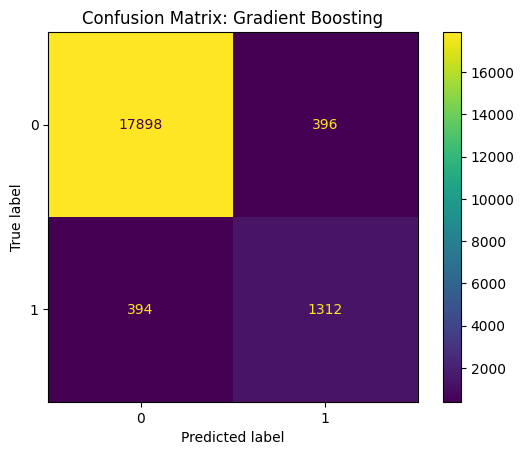


K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18294
           1       0.47      0.81      0.60      1706

    accuracy                           0.91     20000
   macro avg       0.73      0.86      0.77     20000
weighted avg       0.94      0.91      0.92     20000

AUC: 0.9120480343781797


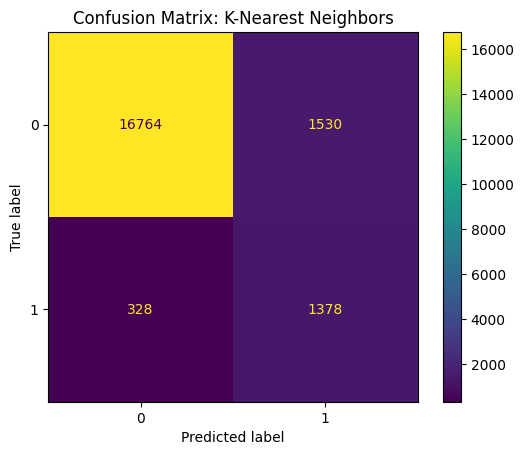


XGBoost:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18294
           1       0.88      0.73      0.80      1706

    accuracy                           0.97     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000

AUC: 0.9770794459031853


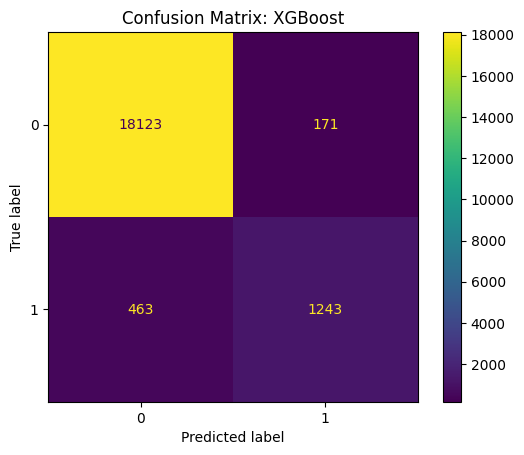

In [53]:
# Different models to classify
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000), 
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')

}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))
    
    y_probs = model.predict_proba(X_test)[:, 1]
    print("AUC:", roc_auc_score(y_test, y_probs))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    ax.set_title(f"Confusion Matrix: {name}")
    plt.show()


| Model | Precision | Recall | F1-Score | AUC|
|-------|-----------|--------|----------|----|
|Random Forest | 0.80   |   0.74 |     0.77 | 0.96924 |
|Gradient Boosting | 0.77   |   0.77   |   0.77 | 0.97608 |
|XGBoost | 0.88   |   0.73    |  0.80 | 0.97707 |

## 6. Conclusion 
In this project, I tackled a binary classification problem with a highly imbalanced dataset. To address the imbalance, I applied SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples of the minority class. This allowed the models to better learn the decision boundaries for both classes, especially the underrepresented one.

I evaluated multiple classifiers:

- Logistic Regression

- Random Forest

- Gradient Boosting

- K-Nearest Neighbors

- XGBoost


**Key Observations:**

XGBoost delivered the highest AUC score (0.977), indicating excellent discrimination between classes. It also achieved a strong balance of precision, recall, and F1-score.

Gradient Boosting also performed well across all metrics and had the second-best AUC.

Random Forest showed robust performance, slightly behind XGBoost and Gradient Boosting.


*XGBoost is the most effective model for this classification task, offering both high accuracy and excellent AUC.*

### Author
### Rubina Parveen 
